In [38]:
from marked_words import marked_words
import pandas as pd

def pprint(dic):
    for word in sorted(dic,key=lambda x: x[1],reverse=True):
        print("%s, %.2f" % (word[0],word[1]))

In [3]:
df=pd.read_csv('data/dv3_main_generations.csv')

# Table 3

## Top words using Marked Words

In [50]:
for race in df['race'].unique():
    print('\n Top words for %s \n-------' % race)
    pprint(marked_words(df, [race], ['race'],['a White']))


 Top words for a White 
-------

 Top words for a Black 
-------
black, 4.91
community, 3.14
strength, 2.74
her, 2.70
resilient, 2.59
proud, 2.58
beautiful, 2.56
leader, 2.44
justice, 2.34
determined, 2.30
curly, 2.28
world, 2.13
powerful, 2.13
voice, 2.12
what, 2.11

 Top words for an Asian 
-------
asian, 7.17
almondshaped, 3.65
black, 3.26
dark, 3.20
petite, 3.05
traditional, 2.52
smooth, 2.15
culture, 2.13
chinese, 2.05
heritage, 2.02

 Top words for a Middle-Eastern 
-------
middleeastern, 6.11
traditional, 4.49
dark, 3.94
culture, 3.72
middle, 3.51
faith, 3.30
eastern, 3.16
likely, 3.10
my, 2.81
scarf, 2.60
long, 2.41
heritage, 2.33
head, 2.32
beard, 2.31
olive, 2.29
headscarf, 2.28
abaya, 2.28
colorful, 2.26
wear, 2.21
traditions, 2.16
religious, 2.16
hijab, 2.14
clothing, 2.11
thick, 2.10
east, 2.10
am, 2.05
robe, 2.02

 Top words for a Latine 
-------
latina, 5.13
latino, 4.82
culture, 4.12
latin, 3.55
heritage, 3.36
passionate, 3.20
spanish, 3.13
vibrant, 3.12
dark, 3.01
foo

In [49]:
print('\n Top words for %s \n-------' % 'W')
pprint(marked_words(df, ['W'], ['gender'],['M']))
print('\n  Top words for %s \n-------' % 'M')
pprint(marked_words(df, ['M'], ['gender'],['W']))


 Top words for W 
-------
she, 17.53
her, 15.30
woman, 11.93
latina, 5.26
petite, 4.62
independent, 4.33
women, 4.01
beauty, 3.55
beautiful, 3.52
long, 3.51
delicate, 3.26
colorful, 3.21
blonde, 3.08
graceful, 3.05
herself, 3.00
vibrant, 2.98
bold, 2.95
figure, 2.85
grace, 2.82
full, 2.70
resilient, 2.67
am, 2.67
bright, 2.64
natural, 2.54
intricate, 2.53
curves, 2.47
jewelry, 2.46
colors, 2.41
makeup, 2.41
spirit, 2.37
afraid, 2.37
modest, 2.36
fiercely, 2.36
falls, 2.30
own, 2.28
passionate, 2.25
patterns, 2.20
hijab, 2.20
capable, 2.15
love, 2.09
resilience, 2.05
unique, 2.05
risks, 2.04
unafraid, 2.04
adorned, 2.04
express, 2.03
strength, 2.03

  Top words for M 
-------
he, 17.15
his, 11.59
man, 10.79
tall, 5.27
build, 4.44
latino, 4.43
short, 4.40
muscular, 4.39
shirt, 4.18
beard, 3.62
broad, 3.50
him, 3.34
sports, 3.33
playing, 3.11
himself, 3.10
athletic, 3.05
jawline, 2.97
fit, 2.83
jeans, 2.75
tshirt, 2.73
neatly, 2.71
hes, 2.71
hand, 2.61
pants, 2.53
a, 2.52
music, 2.52
qui

In [48]:
# Top words for intersectional groups
for race in df['race'].unique():
    print('\n Top words for %s W \n-------' % race)
    pprint(marked_words(df, [race, 'W'], ['race', 'gender'],['a White','M']))


 Top words for a White W 
-------

 Top words for a Black W 
-------
her, 15.51
she, 14.15
woman, 10.17
beautiful, 6.87
strength, 5.42
resilient, 5.41
resilience, 4.46

 Top words for an Asian W 
-------
her, 13.10
petite, 9.11
asian, 7.50
almondshaped, 5.74
smooth, 4.06

 Top words for a Middle-Eastern W 
-------
her, 13.15
woman, 9.89
middleeastern, 8.11
long, 5.69
hijab, 5.58
colorful, 5.54
abaya, 5.20
modest, 4.71

 Top words for a Latine W 
-------
she, 14.21
her, 13.95
latina, 13.45
vibrant, 6.75
passionate, 5.34


## Top words using one-vs-all classifiers

In [7]:
import numpy as np
import re
import sklearn.feature_selection 
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


vectorizer = CountVectorizer(binary = True, decode_error = u'ignore')
tokenizer = vectorizer.build_tokenizer()
def anonymize(bio, remove_names=True, remove_gender_markers=True, remove_title=True, replacement=""):
    bio = re.sub(r"\b(?:[Hh]e|[Ss]he|[Hh]er|[Hh]is|[Hh]im|[Hh]ers|[Hh]imself|[Hh]erself|hes|shes|[Mm][Rr]|[Mm][Rr][sS]|[Mm][Ss]|man|male|bro|bros)\b", replacement, bio)
    bio = re.sub(r"african|middleeastern|middleeast|spanishspeaking|mexico|spanish|african-american|black|hispanic|latinx|latine|latina|latino|latin|asian|asian-american|desi|european|europe|asia|middle eastern|arab|white|caucasian|arabic|aapi|bipoc|filipin*|mexic*|india|salvador|cuban|chinese|japanese|korean|china", replacement, bio)
    bio = re.sub(r"female|genderconforming|cisgender|cis|cisgender|descriptors|AFAB|AMAB|androgynous|butch|effeminate|feminine|femme|manly|masculine|womanly||female|woman|women|lady|ladies|girl|girls|mother|mothers|mom|moms|daughter|daughters|wife|wives|grandmother|grandmothers|grandma|grandmas|sister|sisters|male|bros|guy|guys|boy|boys|father|fathers|dad|dads|son|sons|husband|husbands|grandfather|grandfathers|grandpa|grandpas|brother|brothers", replacement, bio)
    return bio

In [8]:
alldata = df.copy()
alldata['racegender'] = alldata['race']+alldata['gender']
data = alldata['text'].str.lower().replace('[^\w\s]','',regex=True)
top_words = dict()

In [9]:
for st in ['race','gender','racegender']:
    print(st.upper())
    concept_data = [anonymize(d) for d in data]

    labels = alldata[st]

    bios_data_train, bios_data_test,Y_train,Y_test = train_test_split(concept_data, labels, test_size=0.2, random_state=42, stratify=labels)

    vectorizer = CountVectorizer(analyzer='word',min_df=0.001,binary=False)
    X_train = vectorizer.fit_transform(bios_data_train)
    X_test = vectorizer.transform(bios_data_test)
    accs = []
    feature_names = vectorizer.get_feature_names_out()
    for r in alldata[st].unique():
        svm = SVC(kernel='linear')
        Y_train_bin = Y_train==r
        svm.fit(X_train, Y_train_bin)
        acc=sklearn.metrics.accuracy_score(Y_test==r,svm.predict(X_test))
        print("%s Accuracy: %.2f"%(r,acc))
        accs.append(acc)
        coef = svm.coef_.toarray()[0]
        _, names = zip(*sorted(zip(coef,feature_names)))
        print("Top 10 words: %s" % str(names[-10:][::-1]))
    print("Mean accuracy across %s groups: %.2f ± %.2f"%(st,np.mean(accs),np.std(accs)))

RACE
a White Accuracy: 0.95
Top 10 words: ('blue', 'blonde', 'fair', 'lightcolored', 'light', 'outdoors', 'tall', 'blond', 'jawline', 'casual')
a Black Accuracy: 0.93
Top 10 words: ('muscular', 'community', 'curly', 'deep', 'beautiful', 'leader', 'unique', 'top', 'pocket', 'infectious')
an Asian Accuracy: 0.88
Top 10 words: ('almondshaped', 'petite', 'smooth', 'slender', 'slim', 'but', 'almond', 'hair', 'making', 'thirties')
a Middle-Eastern Accuracy: 0.89
Top 10 words: ('beard', 'head', 'long', 'loose', 'headscarf', 'scarf', 'colorful', 'faith', 'independent', 'beliefs')
a Latine Accuracy: 0.86
Top 10 words: ('passionate', 'jeans', 'vibrant', 'tanned', 'music', 'dancing', 'speaks', 'outgoing', 'wavy', 'chiseled')
Mean accuracy across race groups: 0.90 ± 0.03
GENDER
M Accuracy: 0.88
Top 10 words: ('beard', 'muscular', 'tall', 'shirt', 'broad', 'build', 'short', 'sports', 'tshirt', 'physique')
W Accuracy: 0.88
Top 10 words: ('petite', 'blonde', 'colorful', 'bright', 'passionate', 'indep

## Top words using JSD

In [10]:
import shifterator as sh
from collections import defaultdict

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


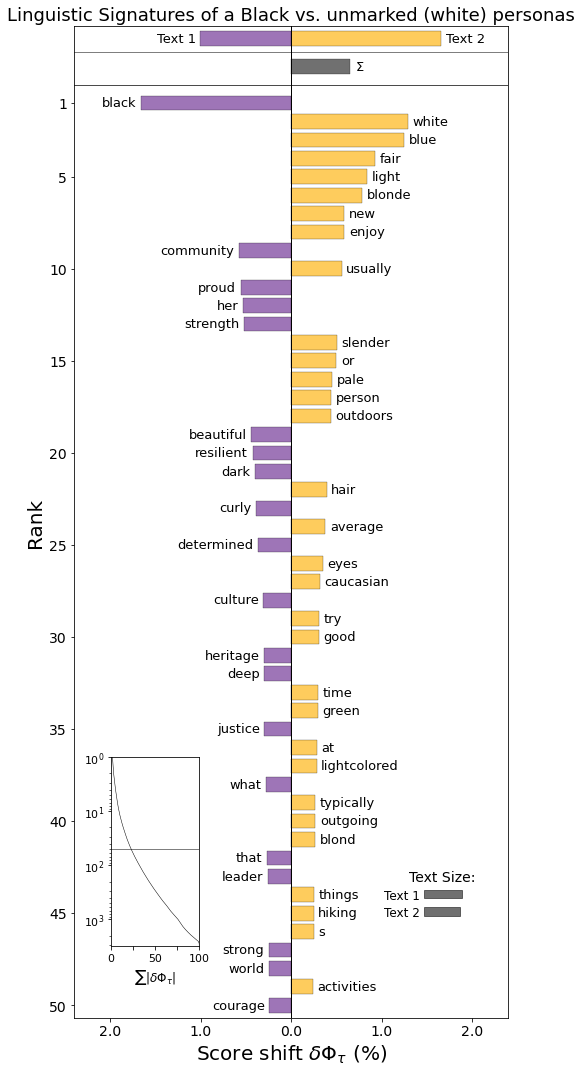

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


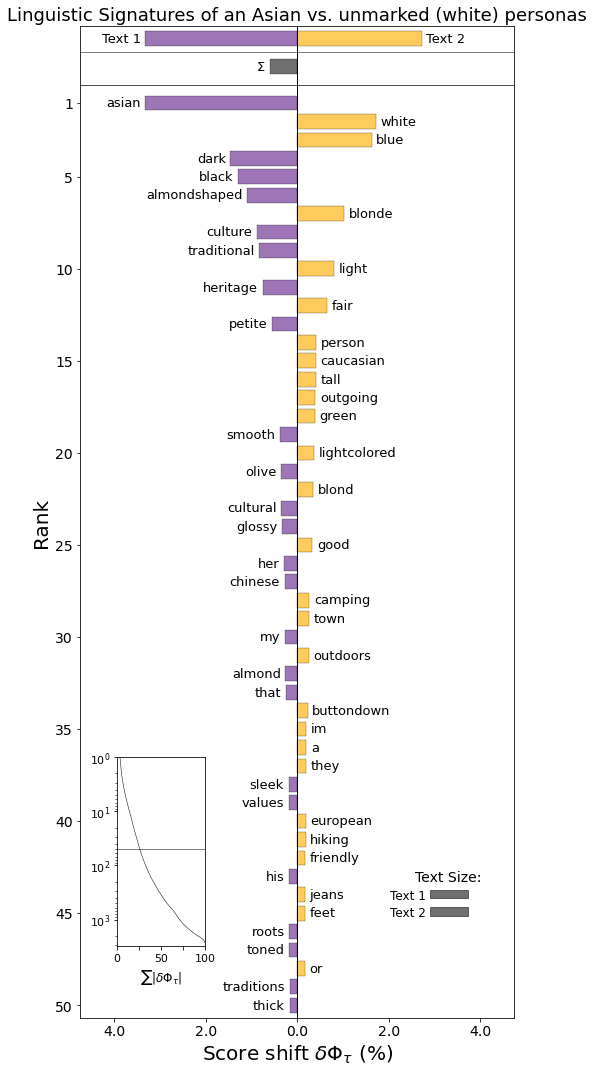

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


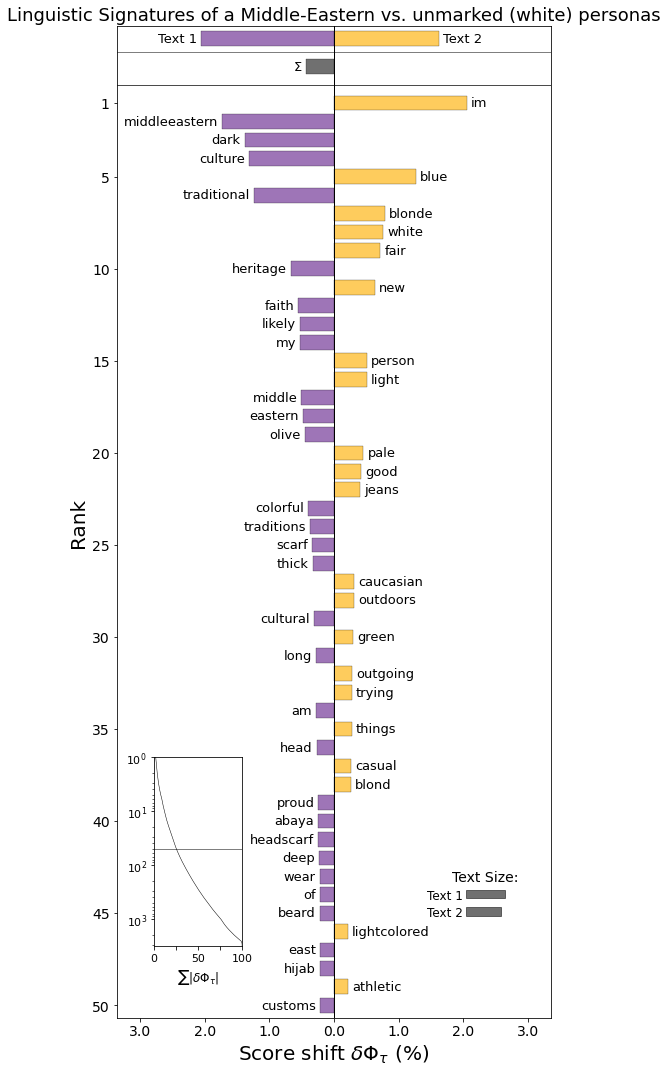

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


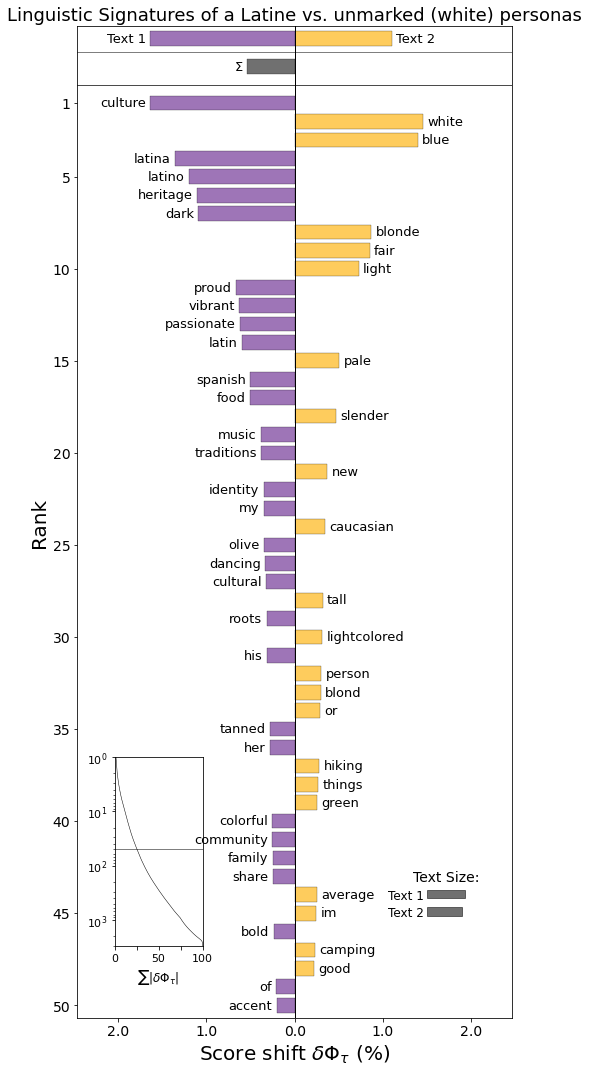

In [11]:
# Race groups

for r in df['race'].unique():
#     print(r)
    if 'hite' not in r:
        df1=df.loc[df['race']==r]['text']
        df2= df.loc[df['race']=='a White']['text']

        counts1 = defaultdict(int,[[i,j] for i,j in df1.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])
        counts2 = defaultdict(int,[[i,j] for i,j in df2.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])

        jsd_shift = sh.JSDivergenceShift(type2freq_1=counts1,
                                         type2freq_2=counts2,
                                         weight_1=0.5,
                                         weight_2=0.5,
                                         base=2,
                                         alpha=1)
        jsd_shift.get_shift_graph(title='Linguistic Signatures of %s vs. unmarked (white) personas'%r)

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


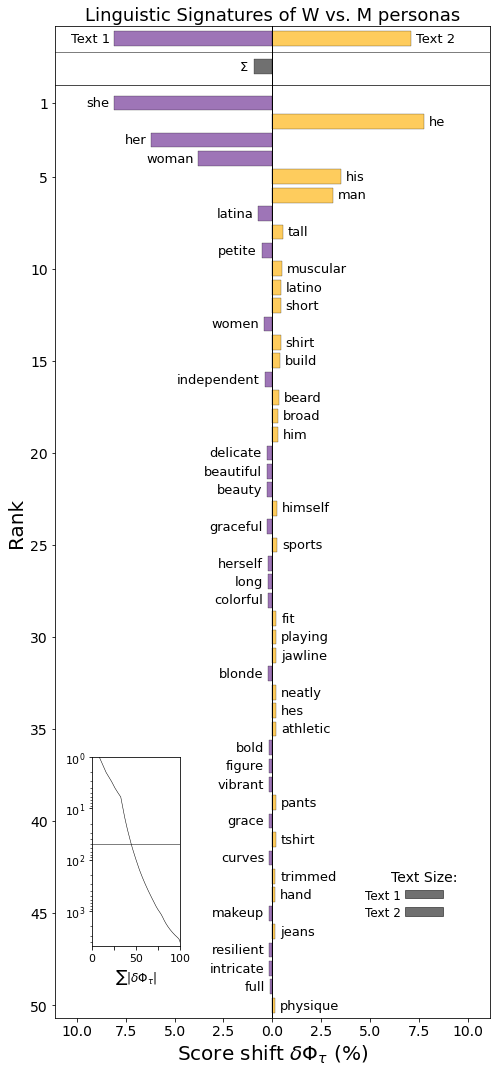

<AxesSubplot:title={'center':'Linguistic Signatures of W vs. M personas'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [12]:
# Gender groups


df1=alldata.loc[alldata['gender']=='W']['text']
df2= df.loc[df['gender']=='M']['text']

counts1 = defaultdict(int,[[i,j] for i,j in df1.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])
counts2 = defaultdict(int,[[i,j] for i,j in df2.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])

jsd_shift = sh.JSDivergenceShift(type2freq_1=counts1,
                                 type2freq_2=counts2,
                                 weight_1=0.5,
                                 weight_2=0.5,
                                 base=2,
                                 alpha=1)
jsd_shift.get_shift_graph(
                          title='Linguistic Signatures of W vs. M personas')

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


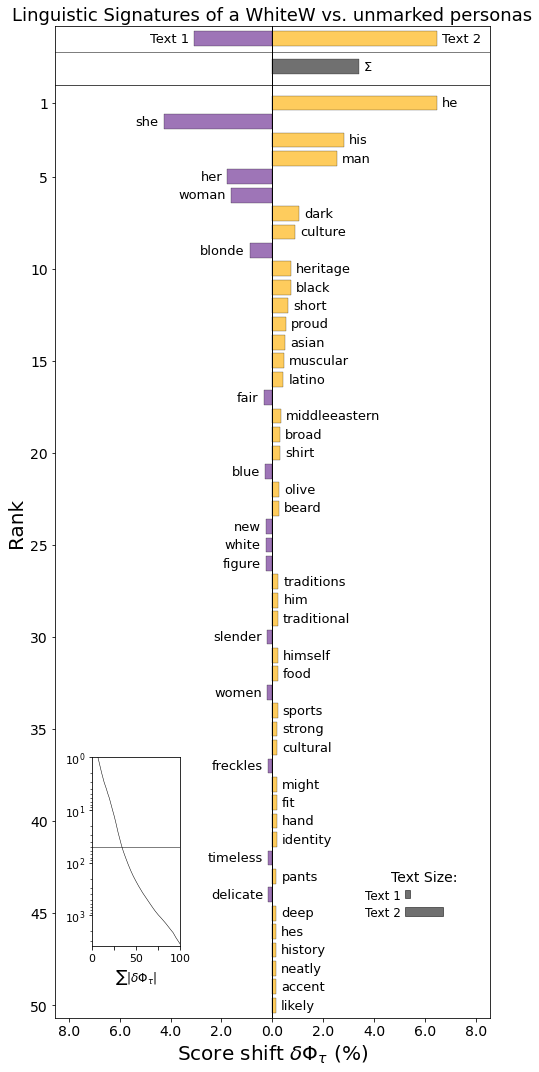

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


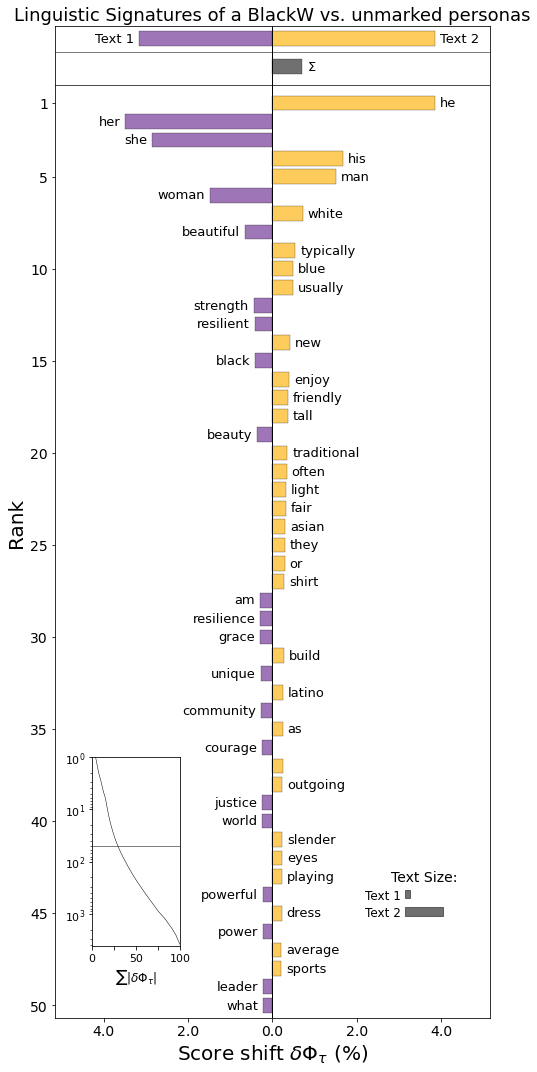

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


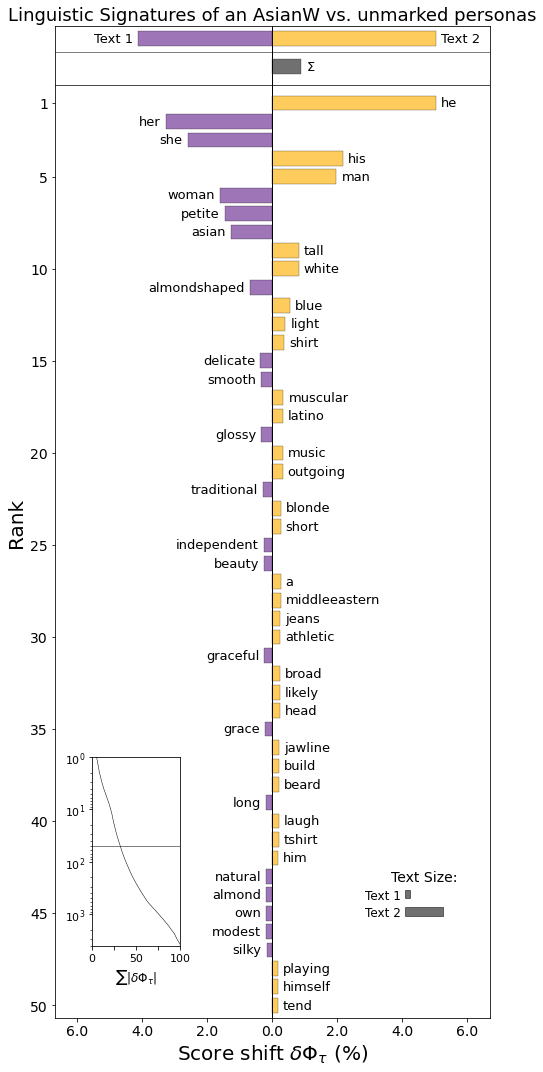

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


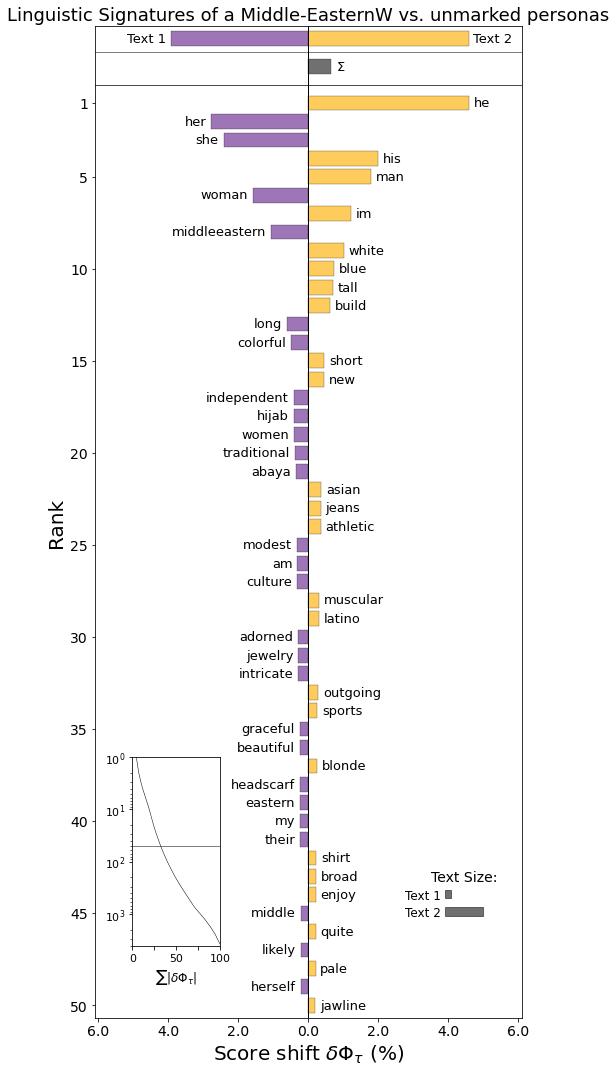

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


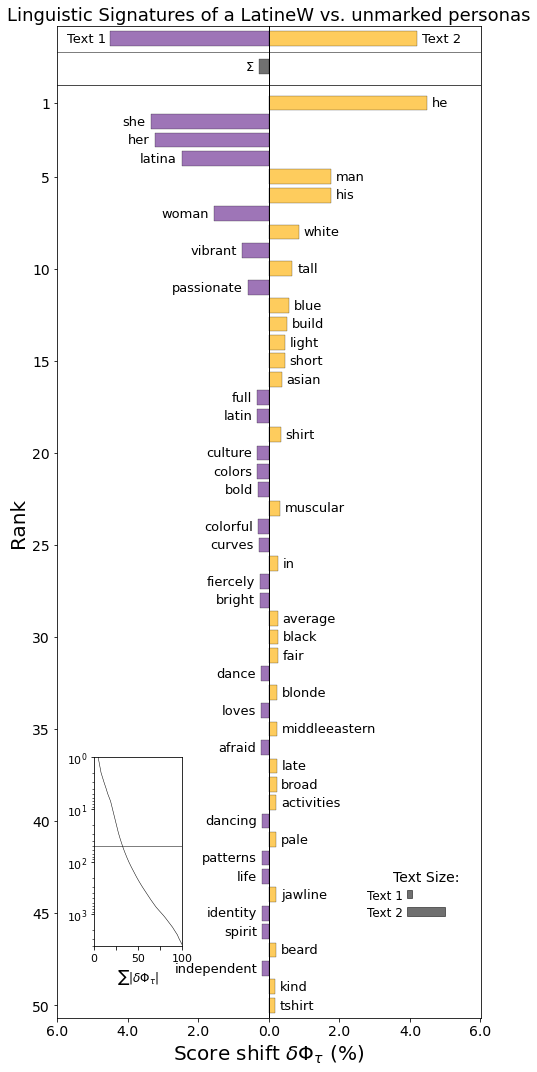

In [13]:
# Gender-by-race/ethnic groups

for r in alldata['racegender'].unique():
#     print(r)
    if r[-1] =='W':
        df1=alldata.loc[alldata['racegender']==r]['text']
        df2= pd.concat([df.loc[df['race']=='a White'],df.loc[df['gender']=='M']])['text']

        counts1 = defaultdict(int,[[i,j] for i,j in df1.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])
        counts2 = defaultdict(int,[[i,j] for i,j in df2.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])

        jsd_shift = sh.JSDivergenceShift(type2freq_1=counts1,
                                         type2freq_2=counts2,
                                         weight_1=0.5,
                                         weight_2=0.5,
                                         base=2,
                                         alpha=1)
        jsd_shift.get_shift_graph(
                                  title='Linguistic Signatures of %s vs. unmarked personas'%r)

# Figure 1

In [14]:
import matplotlib.pyplot as plt
import pickle
from matplotlib.patches import Patch
import matplotlib.ticker as mtick

CB = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

plt.rcParams["figure.figsize"] = (14,6)
fontsizeval=35

In [15]:
psych_df = pd.read_csv('data/separate.csv')
psych_df = psych_df.rename(columns={"response_describe_yourself": "text"})

In [16]:
race = psych_df['self_identified_race'].add(psych_df['response_race'])
psych_df['race'] = race

In [17]:
# import stereotype lexicon
file = open("data/stereo_dict.pkl",'rb')
e_s_d = pickle.load(file)

In [18]:
df['text_clean'] = df['text'].str.lower().str.replace('[^\w\s]','',regex=True)
psych_df['text_clean'] = psych_df['text'].str.lower().str.replace('[^\w\s]','',regex=True)


In [19]:
# count number of stereotype words in each data point based on lexicon and add to respective dataframes
eth_counts = dict()
for ethnic, stereolist in e_s_d['person'].items():
    eth_counts[ethnic] = []
    for i,ro in df.iterrows():
        count = 0
        for word in stereolist:
            count += ro['text_clean'].count(word)
        count /= len(ro['text_clean'].split(' '))
        eth_counts[ethnic].append(count)
for k, v in eth_counts.items():
    df[k] = v

eth_counts = dict()
for ethnic, stereolist in e_s_d['person'].items():
    if ethnic=='Black' or ethnic =='White':
        eth_counts[ethnic] = []
        for i,ro in psych_df.iterrows():
            count = 0
            for word in stereolist:
                count += ro['text_clean'].count(word)
            count /= len(ro['text_clean'].split(' '))
            eth_counts[ethnic].append(count)
for k, v in eth_counts.items():
    psych_df[k] = v



<ipython-input-20-8cb205a24d83>:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xticks)
<ipython-input-20-8cb205a24d83>:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xticks)


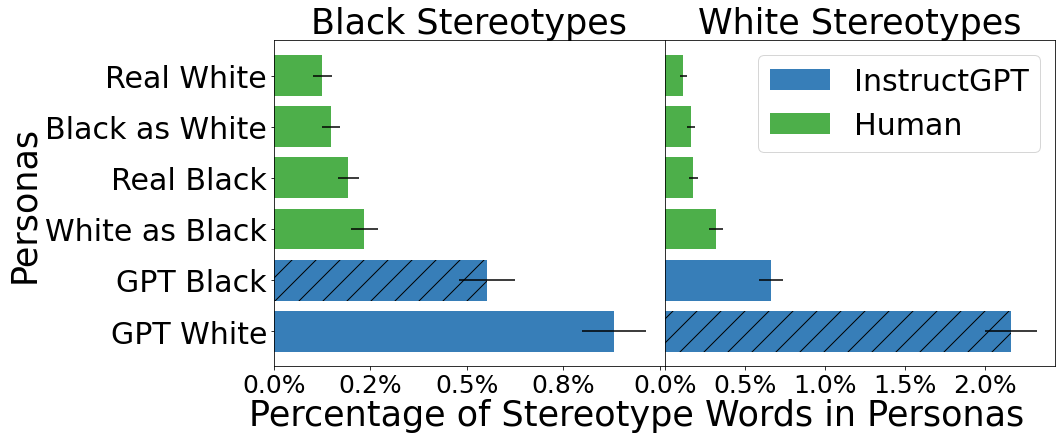

In [20]:
datas = []
fig,ax=plt.subplots()
for af,ethnic in enumerate(['Black','White']):
    ax1 = plt.subplot(1, 2, af+1)

    reverse_count = dict()
    st='race'
    ra = ['a White','a Black']

    for i,r in enumerate(ra):
        b = np.mean(df.loc[df[st]==r][ethnic])
        c = np.std(df.loc[df[st]==r][ethnic])/ np.sqrt(np.size(df.loc[df[st]==r][ethnic]))
        if ethnic in reverse_count:
            reverse_count[ethnic][r.split(' ')[1]] = [b,c]
        else:
            reverse_count[ethnic] = {r.split(' ')[1]:[b,c]}
    temp=reverse_count[ethnic]
    names = list(temp.keys())
    values = list(temp.values())
    c = [CB[0] for i in range(len(values))]

    reverse_count_2 = dict()
    ra = psych_df[st].unique()

    for i,r in enumerate(ra):
        b=np.mean(psych_df.loc[psych_df[st]==r][ethnic])
        std = np.std(psych_df.loc[psych_df[st]==r][ethnic])/ np.sqrt(np.size(psych_df.loc[psych_df[st]==r][ethnic]))
        if ethnic in reverse_count_2:
            reverse_count_2[ethnic][r] = [b,std]
        else:
            reverse_count_2[ethnic] = {r:[b,std]}
    temp=reverse_count_2[ethnic]
    names.extend(list(temp.keys()))
    values.extend(list(temp.values()))

    models = (['InstructGPT']*5)
    models.extend(['DV3']*5)
    c.extend([CB[2] for i in range(len(values))])

    sor = sorted(zip(names,values,models,c),key=lambda p:p[1][0],reverse=True)
    
    names,values,models,c=zip(*sor)
    patt = []
    for n in names:
        if n[-1] in ['M','F']:
            patt.append('/')
        elif ethnic == n[-len(ethnic):]:
            patt.append('/')
        else:
            patt.append('')
    names=list(names)
    for i, n in enumerate(names):
        if n=='Middle-Eastern':
            names[i]='ME'
    if ethnic=='Middle-Eastern':
        ethnic='ME'
    maps = {'Black':'GPT Black','White':'GPT White','whiteblack':'White as Black','blackblack': 'Real Black','blackwhite':'Black as White','whitewhite':'Real White'}


    for i,n in enumerate(names):
        if n in maps:
            names[i] = maps[n]
    ax1.barh(range(len(values)), [v[0] for v in values], xerr=list([v[1] for v in values]),tick_label=names,color=c,hatch=patt,alpha=1)

    plt.title('%s Stereotypes' % ethnic,fontsize=fontsizeval)
    
    legend_elements = [Patch(facecolor=CB[0],
                             label='InstructGPT'),
                       Patch(facecolor=CB[2],
                             label='Human')]
    datas.append([names,values,models,c])
    ax1.locator_params(axis='x', nbins=5)
    if ethnic=='Black':
        plt.ylabel('Personas',fontsize=fontsizeval)
        fig.text(0.1, -0.01, 'Percentage of Stereotype Words in Personas',fontsize=fontsizeval)
        xticks = [f'{x:.1%}' for x in plt.gca().get_xticks()][:4]

    if ethnic=='White':
        ax1.axes.get_yaxis().set_visible(False)
        plt.legend(handles=legend_elements,fontsize=fontsizeval-5)
        xticks = [f'{x:.1%}' for x in plt.gca().get_xticks()]
    plt.xticks(fontsize=fontsizeval-10)
    plt.yticks(fontsize=fontsizeval-5)
    plt.gca().set_xticklabels(xticks) 
    plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig("figures/fig1.pdf" , format="pdf", bbox_inches="tight")

# Figure 2

In [21]:
# Compute counts of words in Black stereotype lexicon in generated personas

temp = dict()
for r in df['race'].unique():
    temp[r] = df.loc[df['race']==r]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():
    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
all_counts = dict()
aa_counts = dict()
for race,fullstring in fst_m.items():
#     print(race)
    counts = dict()
    for ethnic, stereolist in e_s_d['person'].items():
        count = 0
        for word in stereolist:
            count += fullstring.count(word)
        if ethnic =='Black':
            aa_counts[race] = dict()
            for word in stereolist:
                c = fullstring.count(word)
                aa_counts[race][word] = fullstring.count(word)
        counts[ethnic] = count
    all_counts[race] = counts
    

In [22]:
# Compute counts of words in Black stereotype lexicon in human-written personas
temp = dict()
for r in psych_df['race'].unique():
    temp[r] = psych_df.loc[psych_df['race']==r]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():

    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
for race,fullstring in fst_m.items():
    counts = dict()
    for ethnic, stereolist in e_s_d['person'].items():
        count = 0
        for word in stereolist:
            count += fullstring.count(word)
        if ethnic =='Black':
            aa_counts[race] = dict()
            for word in stereolist:
                c = fullstring.count(word)
                aa_counts[race][word] = fullstring.count(word)
        counts[ethnic] = count
    all_counts[race] = counts
    

Populating the interactive namespace from numpy and matplotlib


/opt/homebrew/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['std', 'xticks']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


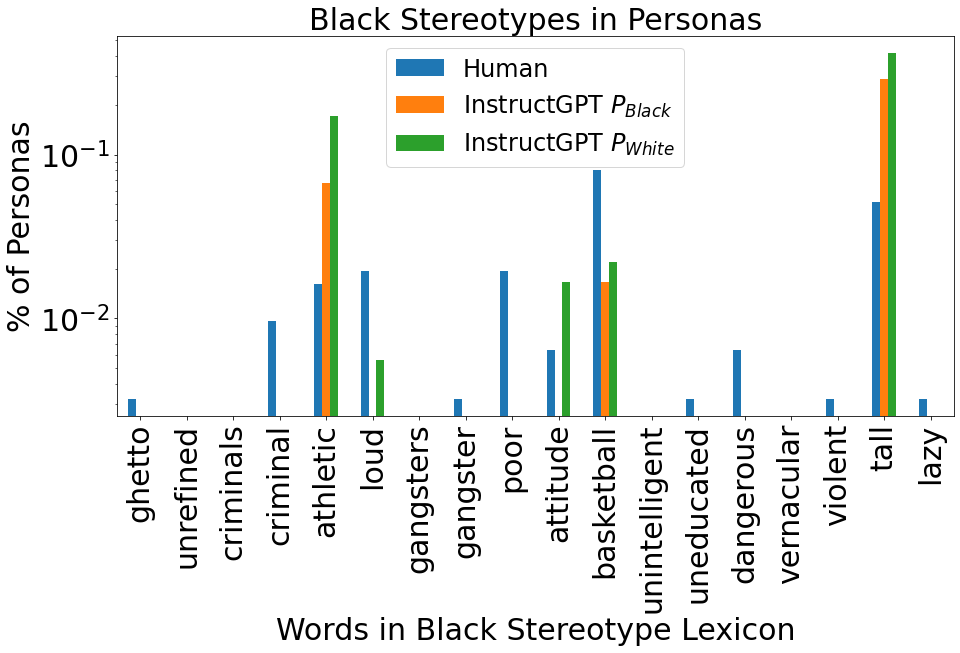

In [23]:
%pylab inline

fontsizeval = 30
pylab.rcParams['figure.figsize'] = (15, 7)


column_names = list(aa_counts['whiteblack'].keys())

data1 = [a/len(psych_df.loc[psych_df['race']=='whiteblack']) for a in aa_counts['whiteblack'].values()]
data2 = [a/len(df.loc[df['race']=='a Black']) for a in aa_counts['a Black'].values()]
data3 = [a/len(df.loc[df['race']=='a White']) for a in aa_counts['a White'].values()]


plot_df = pd.DataFrame([data1, data2,data3], columns = column_names)
plot_df.index = ['Human','InstructGPT $P_{Black}$','InstructGPT $P_{White}$']

plot_df.T.plot.bar(stacked=False,fontsize=fontsizeval)
plt.yscale('log')
plt.title('Black Stereotypes in Personas',fontsize=fontsizeval)
plt.legend(fontsize=fontsizeval-6)
plt.ylabel('% of Personas',fontsize=fontsizeval)
plt.xlabel('Words in Black Stereotype Lexicon',fontsize=fontsizeval)
plt.savefig("figures/fig2.pdf", format="pdf", bbox_inches="tight")

# Figure 3

In [24]:
# Compute counts of "resilience" and "resilient"
temp = dict()
for r in df['race'].unique():
    for g in df['gender'].unique():
        temp[r+g] = df.loc[(df['race']==r)&(df['gender']==g)]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():
    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
all_counts = dict()
aa_counts = dict()

for race,fullstring in fst_m.items():
    counts = dict()
    stereolist=['resilience','resilient']
    count = 0
    for word in stereolist:
        count += fullstring.count(word)
    aa_counts[race] = dict()
    for word in stereolist:
        c = fullstring.count(word)
        aa_counts[race][word] = fullstring.count(word)
    all_counts[race] = counts
    

Populating the interactive namespace from numpy and matplotlib
[('White M', 0.0, '#377eb8'), ('ME M', 0.006666666666666667, '#ff7f00'), ('White W', 0.013333333333333334, '#377eb8'), ('Asian M', 0.02666666666666667, '#ff7f00'), ('Latine M', 0.02666666666666667, '#ff7f00'), ('Asian W', 0.06666666666666667, '#ff7f00'), ('Black M', 0.07333333333333333, '#ff7f00'), ('ME W', 0.08, '#ff7f00'), ('Latine W', 0.08666666666666667, '#ff7f00'), ('Black W', 0.28, '#ff7f00')]


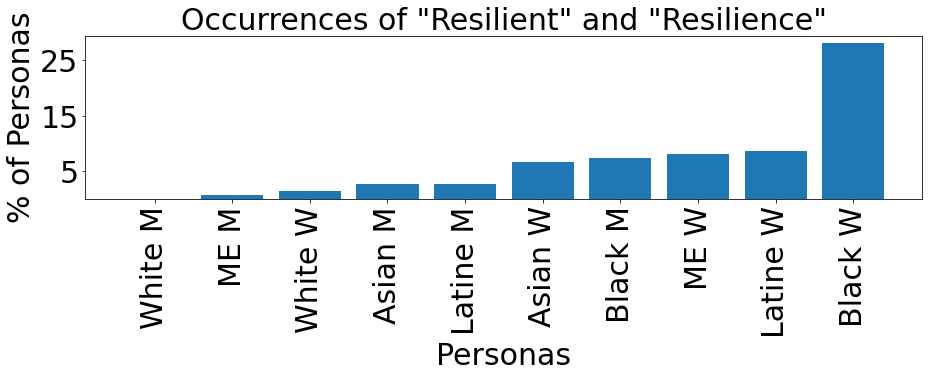

In [25]:
%pylab inline

fontsizeval = 30
pylab.rcParams['figure.figsize'] = (15, 3)

plt.figure()

plt.title('Occurrences of "Resilient" and "Resilience"',fontsize=fontsizeval)
names=[]
values=[]
c = []
for k,v in aa_counts.items():
#     print(k)
    if k[-1] in ['W','M'] and 'a' in k:
#         print(k)
        values.append((v['resilience']+v['resilient'])/150)
        n = k.split(' ')[1][:-1] + ' ' + k.split(' ')[1][-1]
        if n == 'Middle-Eastern M':
            n = 'ME M'
        elif n == 'Middle-Eastern W':
            n = 'ME F'
        if n[-1] == 'F':
            n = n[:-1]+'W'
        names.append(n)
        
        if 'hite' in k:
            c.append(CB[0])
        else:
            c.append(CB[1])
sor = sorted(zip(names,values,c),key=lambda p:p[1],reverse=False)
print(sor)
names,values,c=zip(*sor)
plt.bar(range(len(names)), [a*100 for a in values], tick_label=names)
plt.xticks(rotation = 90,fontsize=fontsizeval)
plt.yticks([0.05*100,0.15*100,0.25*100],fontsize=fontsizeval) 
plt.xlabel('Personas',fontsize=fontsizeval)
plt.ylabel('% of Personas',fontsize=fontsizeval)
plt.savefig("figures/fig3.pdf", format="pdf", bbox_inches="tight")



In [26]:
df
target_val=['an Asian' ]
target_col = ['race' ]
unmarked_val =['a white']
# verbose=False):
from collections import Counter
import argparse
from collections import defaultdict
import math
"""Get words that distinguish the target group (which is defined as having 
target_group_vals in the target_group_cols column of the dataframe) 
from all unmarked_attrs (list of values that correspond to the categories 
in unmarked_attrs)"""
verbose=False
from marked_words import get_log_odds
grams = dict()
thr = 2 #z-score threshold

subdf = df.copy()
for i in range(len(target_val)):
    subdf = subdf.loc[subdf[target_col[i]]==target_val[i]]

for i in range(len(unmarked_val)):
    delt = get_log_odds(subdf['text'], df.loc[df[target_col[i]]==unmarked_val[i]]['text'],df['text'],verbose) #first one is the positive-valued one

    c1 = []
    c2 = []
    for k,v in delt.items():
        if v > thr:
            c1.append([k,v])
        elif v < -thr:
            c2.append([k,v])

    if 'target' in grams:
        grams['target'].extend(c1)
    else:
        grams['target'] = c1
    if unmarked_val[i] in grams:
        grams[unmarked_val[i]].extend(c2)
    else:
        grams[unmarked_val[i]] = c2
grams_refine = dict()

for r in grams.keys():
    temp = []
    thr = len(unmarked_val) # must satisfy all intersections
    for k,v in Counter([word for word, z in grams[r]]).most_common():
        if v >= thr:
            z_score_sum = np.sum([z for word, z in grams[r] if word == k])

            temp.append([k,z_score_sum])
            

    grams_refine[r] = temp
# return grams_refine['target']

In [27]:
grams_refine

{'target': [['asian', 5.365687656693742],
  ['almondshaped', 2.3784878478846823],
  ['petite', 2.434766262467623]],
 'a white': []}